In [1]:
# IMport libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import string

import spacy

from wordcloud import WordCloud


In [2]:
# Load the dataset
data = pd.read_csv('IMDB Dataset.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
review       50000 non-null object
sentiment    50000 non-null object
dtypes: object(2)
memory usage: 781.4+ KB


In [4]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# Exploratory Data Analysis and Cleaning text.

In [5]:
data['sentiment'].value_counts()

negative    25000
positive    25000
Name: sentiment, dtype: int64

In [6]:
# Check if the dataset have nulls
data.isnull().sum()

review       0
sentiment    0
dtype: int64

Changing the labels positive and negative to binary

In [7]:
data['sentiment'] = np.where(data['sentiment'] == 'negative', 0, 1)

In [8]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


[[Text(0, 0, 'negative'), Text(0, 0, 'positive')]]

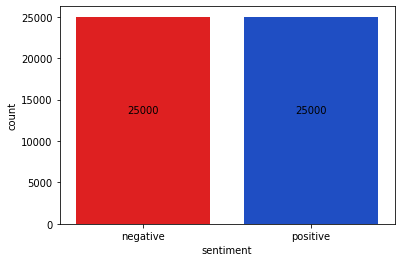

In [9]:
# Plotting the number of positive and negatives reviews 

ax = sns.countplot(data['sentiment'], palette = ['#fe0002', '#0343df'])

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()/2), ha = 'center', 
                   va = 'center', xytext = (0, 10), textcoords = 'offset points')
    
ax.set(xticklabels=['negative','positive'])


In [10]:
def remove_punctuation(text):
    """Function that remove punctuation from a text"""
    return "".join([x for x in text if x not in string.punctuation])

In [11]:
# Loading pretrained model for word recognition
nlp = spacy.load('en_core_web_sm', parser=False, entity=False)

In [12]:
def tokenizer(docs, nlp=nlp):
    """
    Takes a pandas series or list of texts and returns the list with the text cleaned
    """
    text = []
    for doc in nlp.pipe(docs):
        words = []
        for token in doc:
            if token.pos_ == 'PRON':
                words.append(token.text)
                continue
            if token.pos_ == 'PART':
                words.append(token.lemma_.lower())
                continue
            if token.is_alpha and token.lemma_ != '-PRON-':
                words.append(token.lemma_.lower())
        text.append(' '.join(map(str, words)))
    return text

In [13]:
example = ["I don't like this movie, I can't watch it"]
print(example)

["I don't like this movie, I can't watch it"]


In [14]:
example = [remove_punctuation(example)]
print(example)

["I don't like this movie, I can't watch it"]


In [15]:
tokenizer(example)

['I do not like this movie I can not watch it']

In [16]:
# Removing punctuation from all reviews
data['review'] = data['review'].apply(lambda x: remove_punctuation(x))

In [17]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production br br The filmin...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically theres a family where a little boy J...,0
4,Petter Matteis Love in the Time of Money is a ...,1


In [18]:
# Cleaning all reviews and lemmatization
data['cleaned'] = tokenizer(data['review'])

In [19]:
data.head()

,review,sentiment,cleaned
0,One of the other reviewers has mentioned that ...,1,one of the other reviewer have mention that af...
1,A wonderful little production br br The filmin...,1,a wonderful little production br br the filmin...
2,I thought this was a wonderful way to spend ti...,1,I think this be a wonderful way to spend time ...
3,Basically theres a family where a little boy J...,0,basically there s a family where a little boy ...
4,Petter Matteis Love in the Time of Money is a ...,1,petter matteis love in the time of money be a ...


In [20]:
# Saving the cleaned dataset
data.to_csv('reviews_cleaned.csv')

In [27]:
df = pd.read_csv('reviews_words')

When we take out the stop words, we obtain the following result

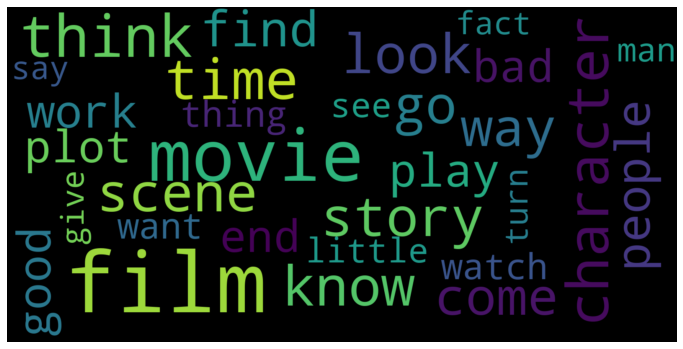

In [28]:
# Common words of negatives reviews

neg_commentary = df[df['sentiment'] == 0]
neg_string = []
for review in neg_commentary['cleaned']:
    neg_string.append(review)
neg_string = pd.Series(neg_string).str.cat(sep=' ')



wordcloud = WordCloud(width=1600, height=800,max_font_size=200, max_words=30).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

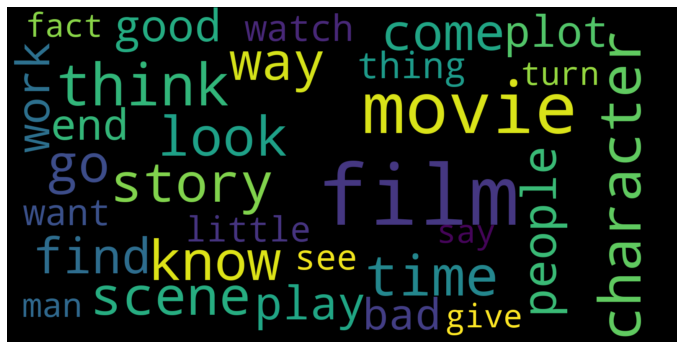

In [29]:
# Common words of positive reviews

pos_commentary = df[df['sentiment'] == 1]
neg_string = []
for review in neg_commentary['cleaned']:
    neg_string.append(review)
neg_string = pd.Series(neg_string).str.cat(sep=' ')

from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200, max_words=30).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()